In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

#Function

In [177]:
def plot_loss(history):
  history_dataframe = pd.DataFrame(history.history)

  min_loss_index = history_dataframe[history_dataframe['loss']==min(history_dataframe['loss'])].index.values
  min_loss = history_dataframe.loc[min_loss_index]['loss']
  min_val_loss_index = history_dataframe[history_dataframe['val_loss']==min(history_dataframe['val_loss'])].index.values
  min_val_loss = history_dataframe.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Minimun Loss :", min_loss)
  print("---------------------------------------")
  print("Minimun Validation Loss :", min_val_loss)

In [178]:
def algo_evaluation(model):
  predictions = model.predict(feature_test)
  predictions = predictions.flatten()

  print("MSE (Mean Squared Error)         -> ", mean_squared_error(label_test, predictions))
  print("MAE (Mean Absolute Error)        -> ", mean_absolute_error(label_test, predictions))
  print("r^2 score                        -> ", r2_score(label_test, predictions))
  print('RMSE (Root Mean Squared Error)   -> ', np.sqrt(mean_squared_error(label_test, predictions)))

In [179]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

#Data Cleaning

In [180]:
dataset = pd.read_csv('/content/drive/My Drive/Colab_Test/Dataset/6. Deep Learning/auto-mpg.csv')

In [181]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [182]:
dataset.drop(['car name'], axis=1, inplace=True)

In [183]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [184]:
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


In [185]:
dataset[['cylinders','weight', 'model year', 'origin']] = dataset[['cylinders','weight', 'model year', 'origin']].astype(float)

In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    float64
 6   origin        398 non-null    float64
 7   mpg           398 non-null    float64
dtypes: float64(7), object(1)
memory usage: 25.0+ KB


In [187]:
dataset.replace("?", np.nan, inplace=True)

In [188]:
avg_horsepower = dataset['horsepower'].astype(float).mean(axis=0)

In [189]:
dataset['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [190]:
dataset[['horsepower']] = dataset[['horsepower']].astype(float)

In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    float64
 6   origin        398 non-null    float64
 7   mpg           398 non-null    float64
dtypes: float64(8)
memory usage: 25.0 KB


In [192]:
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,17.0


#EDA

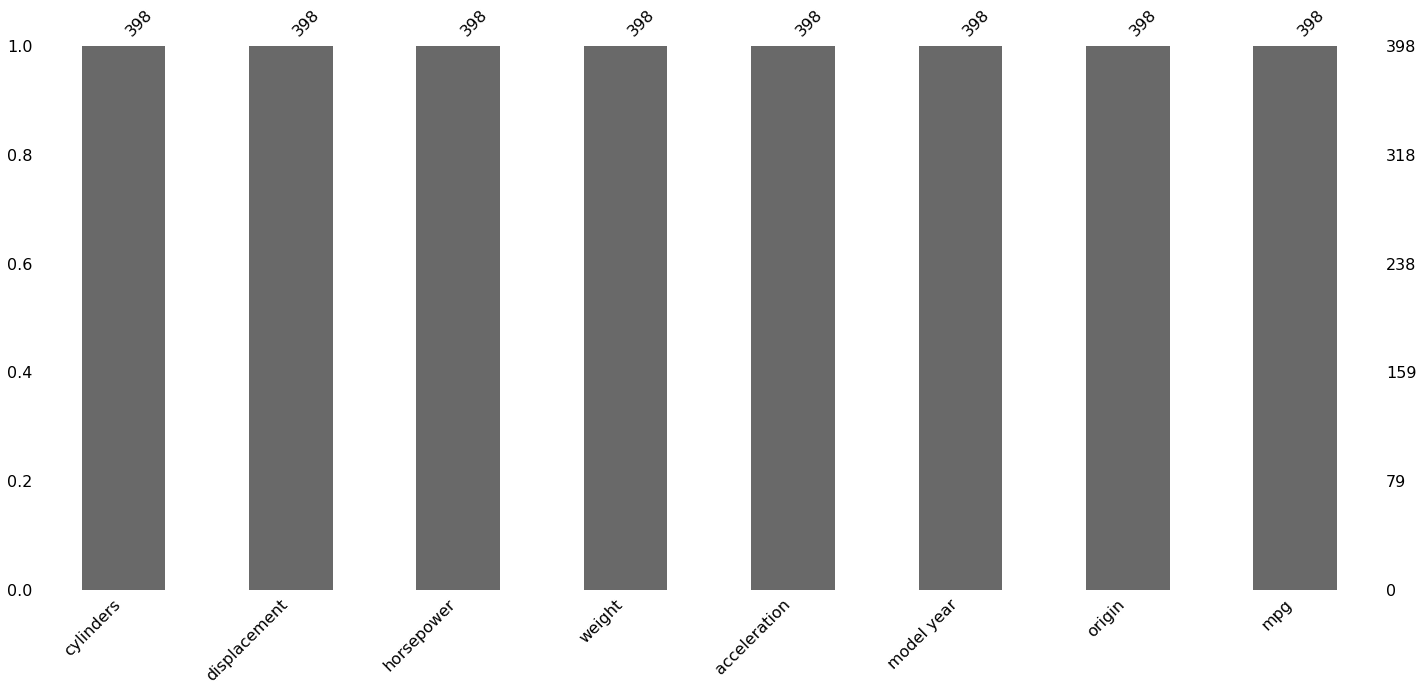

In [193]:
pd.options.display.max_columns = None
import missingno as msno

msno.bar(dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe02ce48d0>,
      dtype=object)

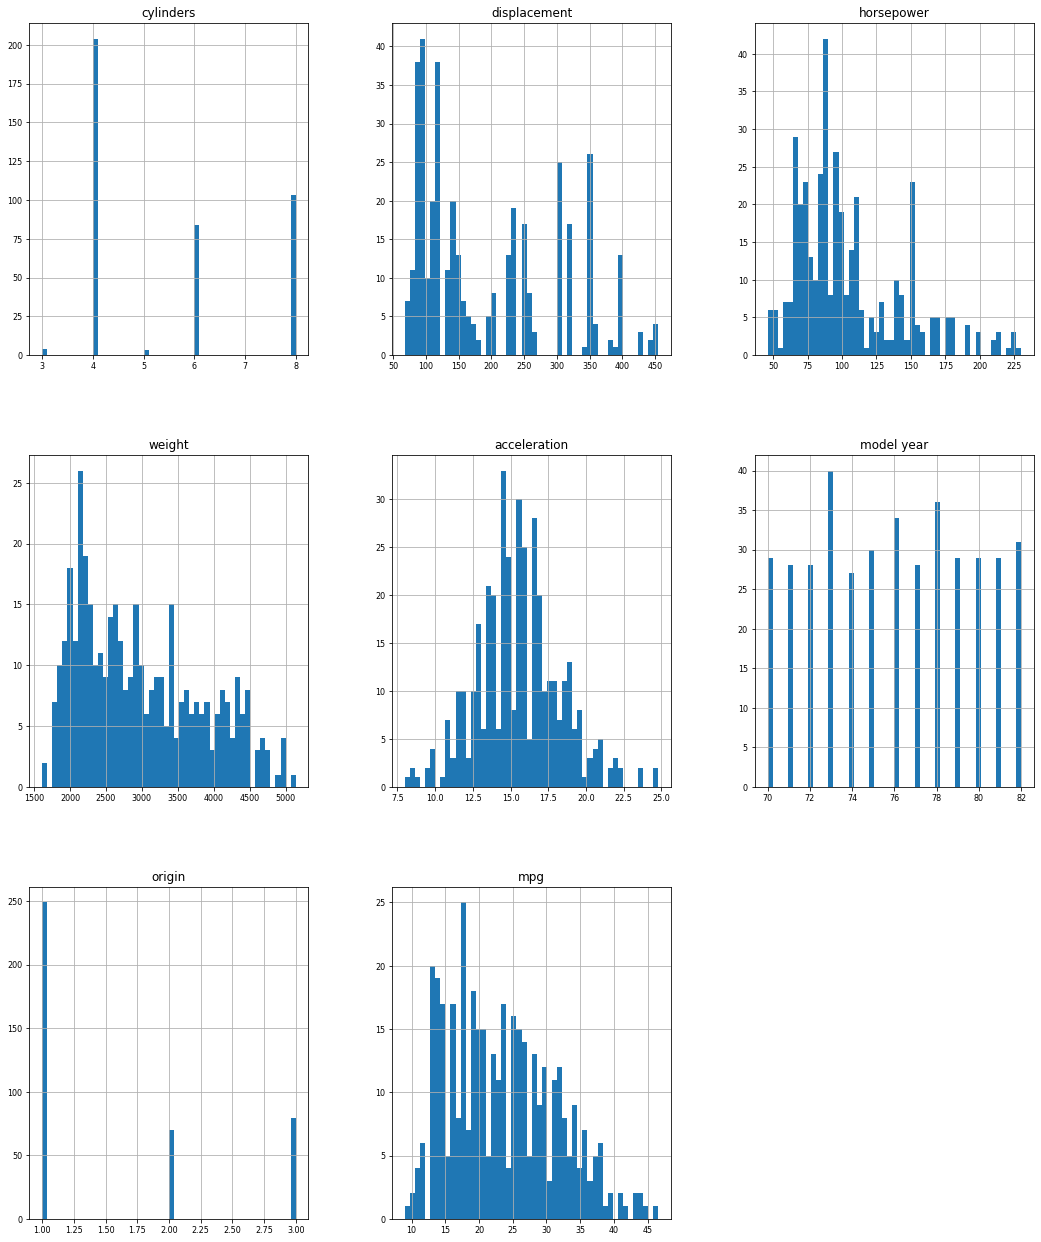

In [194]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [195]:
corr = dataset.corr()

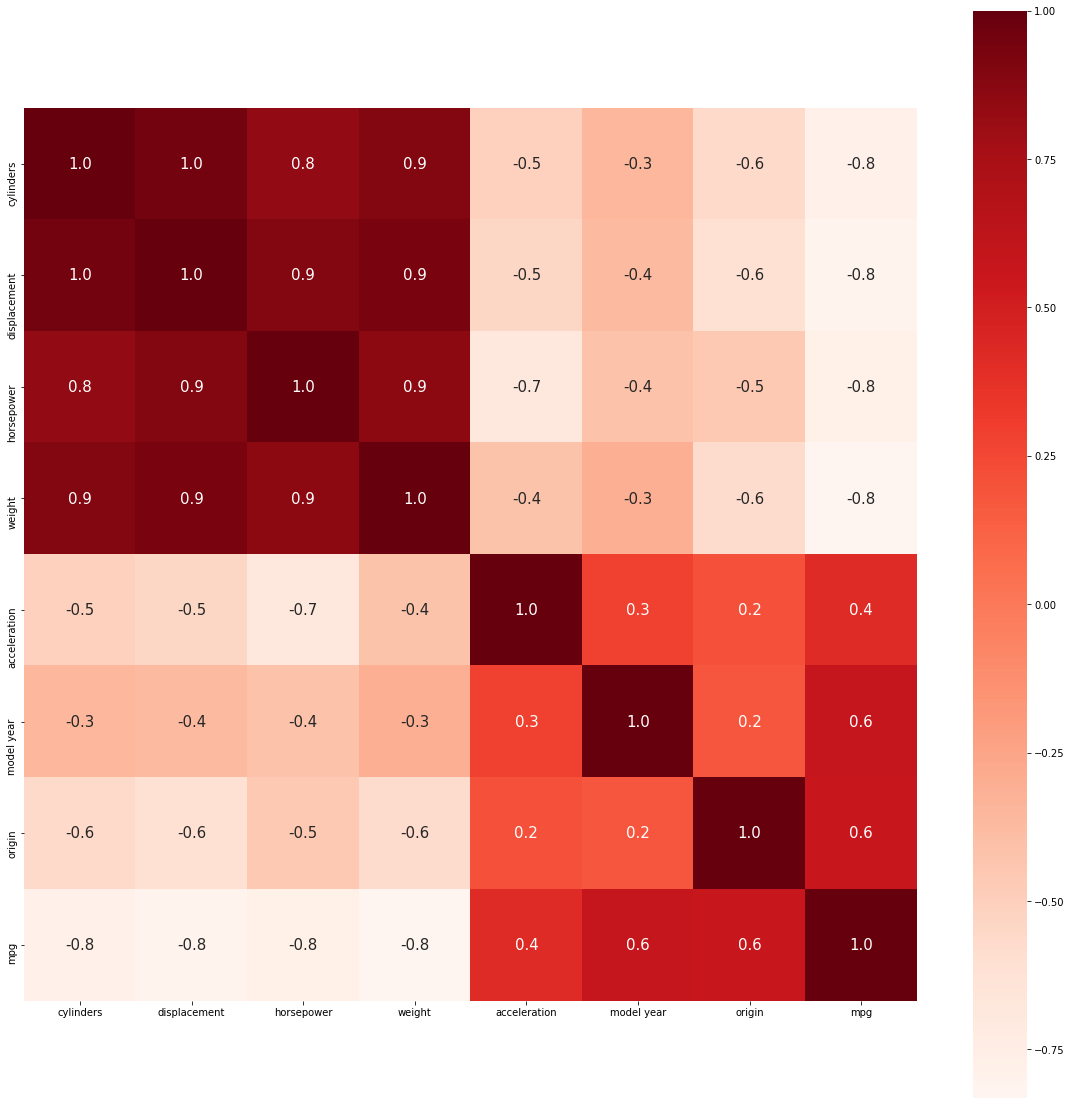

In [196]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')

#Split Data

In [197]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [198]:
label = dataset['mpg']
features = dataset.drop(['mpg'], axis=1)

In [199]:
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [200]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [201]:
model = LinearRegression()
model.fit(feature_train, label_train)
algo_evaluation(model)

MSE (Mean Squared Error)         ->  0.2082842559141632
MAE (Mean Absolute Error)        ->  0.3684300891993139
r^2 score                        ->  0.7924612118571435
RMSE (Root Mean Squared Error)   ->  0.4563816998020004


#Deep Learning

In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf, random

##Baseline Model

In [203]:
base_model = Sequential()
base_model.add(Dense(200, input_dim=7, kernel_initializer='normal', activation='relu'))
base_model.add(Dense(1, kernel_initializer='normal'))

base_model.compile(loss='mean_squared_error', optimizer='adam')

In [204]:
base_history = base_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4290 - val_loss: 0.2695
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2019 - val_loss: 0.1979
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1814
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1672
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1247 - val_loss: 0.1700
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1218 - val_loss: 0.1616
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1160 - val_loss: 0.1564
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1115 - val_loss: 0.1532
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1112 - val_loss: 0.1505
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1076 - val_loss: 0.1549
Epoch 11/

In [205]:
predictions = base_model.predict(feature_test)
predictions = predictions.flatten()
algo_evaluation(base_model)

MSE (Mean Squared Error)         ->  0.132482797384534
MAE (Mean Absolute Error)        ->  0.260282381201443
r^2 score                        ->  0.8679913702632762
RMSE (Root Mean Squared Error)   ->  0.3639818640873938


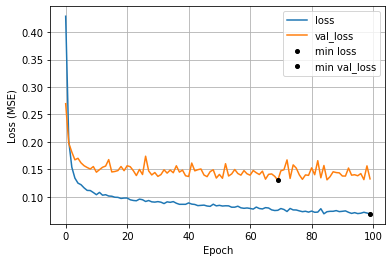

Minimun Loss : 99    0.068574
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 69    0.129907
Name: val_loss, dtype: float64


In [206]:
plot_loss(base_history)

##Deeper Model

In [207]:
deeper_model = Sequential()
deeper_model.add(Dense(200, input_dim=7, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(100, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

In [208]:
history_deeper_model = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 5ms/step - loss: 0.4783 - val_loss: 0.2443
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1618 - val_loss: 0.1723
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1877
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1221 - val_loss: 0.1501
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1146 - val_loss: 0.1585
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1032 - val_loss: 0.1561
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1034 - val_loss: 0.1766
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1028 - val_loss: 0.1648
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1020 - val_loss: 0.1515
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0948 - val_loss: 0.1565
Epoch 11/50
40/40 [

In [209]:
predictions = deeper_model.predict(feature_test)
predictions = predictions.flatten()
algo_evaluation(deeper_model)

MSE (Mean Squared Error)         ->  0.1473911706491441
MAE (Mean Absolute Error)        ->  0.29585373992192093
r^2 score                        ->  0.8531363553849858
RMSE (Root Mean Squared Error)   ->  0.383915577502586


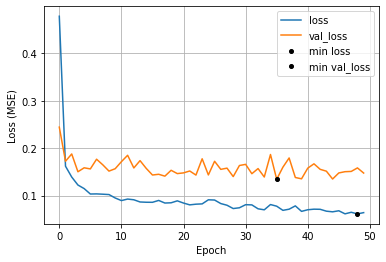

Minimun Loss : 48    0.061161
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 35    0.134269
Name: val_loss, dtype: float64


In [210]:
plot_loss(history_deeper_model)

#Wider Model

In [211]:
wider_model = Sequential()
wider_model.add(Dense(200, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

In [212]:
history_wider_model = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4512 - val_loss: 0.2742
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2007 - val_loss: 0.2065
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1544 - val_loss: 0.1821
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1362 - val_loss: 0.1779
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1249 - val_loss: 0.1726
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1176 - val_loss: 0.1595
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1140 - val_loss: 0.1511
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1114 - val_loss: 0.1526
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1085 - val_loss: 0.1721
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1080 - val_loss: 0.1530
Epoch 11/

In [213]:
predictions = wider_model.predict(feature_test)
predictions = predictions.flatten()
algo_evaluation(wider_model)

MSE (Mean Squared Error)         ->  0.14100268554679002
MAE (Mean Absolute Error)        ->  0.2784591410071142
r^2 score                        ->  0.8595019755341999
RMSE (Root Mean Squared Error)   ->  0.37550324305761995


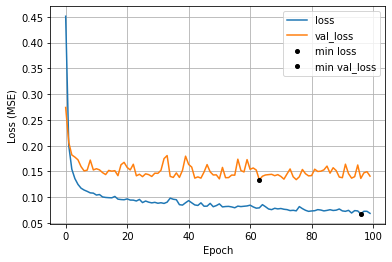

Minimun Loss : 96    0.067639
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 63    0.133661
Name: val_loss, dtype: float64


In [214]:
plot_loss(history_wider_model)

#Kesimpulan : 

##**Dari data diatas, dari pengujian 3 model yaitu Baseline Model, Deeper Model, dan Wilder Model dengan perbandingan 0.86 : 0.85 : 0.85 serta dengan MSE lebih kecil pula. Didapatkan Baseline Model yang terbaik sehingga dapat dijadikan bahan pengujian dengan menambahkan Optimizer.**

#Input Optimizer

In [244]:
from tensorflow.keras.optimizers import SGD, RMSprop

##SGD

In [239]:
base_model_tuned_sgd = Sequential()
base_model_tuned_sgd.add(Dense(200, input_dim=7, kernel_initializer='normal', activation='relu'))
base_model_tuned_sgd.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.95)

base_model_tuned_sgd.compile(loss='mean_squared_error', optimizer=opt)

base_model_tuned_sgd.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 200)               1600      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 201       
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [240]:
history_tuned_sgd = base_model_tuned_sgd.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6838 - val_loss: 0.2921
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2292 - val_loss: 0.2504
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1724 - val_loss: 0.1861
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1797
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1719
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1306 - val_loss: 0.1661
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1261 - val_loss: 0.1622
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1228 - val_loss: 0.1630
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1207 - val_loss: 0.1613
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1170 - val_loss: 0.1557
Epoch 11/

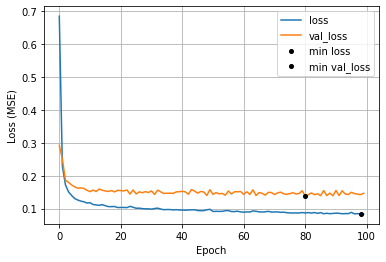

Minimun Loss : 98    0.083937
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 80    0.138022
Name: val_loss, dtype: float64


In [241]:
plot_loss(history_tuned_sgd)

##RMSprop

In [249]:
base_model_tuned_rmsprop = Sequential()
base_model_tuned_rmsprop.add(Dense(200, input_dim=7, kernel_initializer='normal', activation='relu'))
base_model_tuned_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

base_model_tuned_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

base_model_tuned_rmsprop.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 200)               1600      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 201       
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [250]:
history_tuned_rmsprop = base_model_tuned_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3582 - val_loss: 0.2319
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1735 - val_loss: 0.1882
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1644
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1281 - val_loss: 0.1600
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1227 - val_loss: 0.1588
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1183 - val_loss: 0.1534
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1131 - val_loss: 0.1485
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1126 - val_loss: 0.1527
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1067 - val_loss: 0.1762
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1062 - val_loss: 0.1447
Epoch 11/

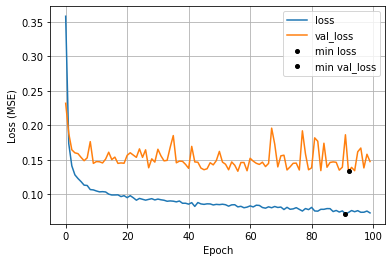

Minimun Loss : 91    0.071347
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 92    0.132926
Name: val_loss, dtype: float64


In [251]:
plot_loss(history_tuned_rmsprop)

#Kesimpulan :

##Pada pengujian diatas, dimana Baseline Model diuji dengan ditambahkan optimizer dan didapatkan Adam yang terbaik pada pengujian ini dibandingkan RMSprop dan SGD. yang mana MSE didapatkan 0.12 dan paling kecil dibandingkan yang lain.